In [27]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
#File format is an ecncrypted format (not ASCII based) and hence, the same cannot be extracted directly)
import h5py 
h5f = h5py.File ('SVHN_single_grey1.h5','r')

### Data fetching and undetstanding train-test splits

In [30]:
### Checking the data classifications as defiined in the h5 data set 
print('The data has been classified as', h5f.keys())

The data has been classified as <KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


In [31]:
X_train=h5f['X_train'][:]
X_val=h5f['X_val'][:]
X_test=h5f['X_test'][:]

y_train=h5f['y_train'][:]
y_val=h5f['y_val'][:]
y_test=h5f['y_test'][:]

h5f.close()

In [32]:
print('The data for X_train has ', X_train.shape[0],' images,' , X_train.shape[1] , 'rows and ',X_train.shape[2],'columns \n')
print('The data for X_validation has ', X_val.shape[0],' images,' , X_val.shape[1] , 'rows and ',X_val.shape[2],'columns \n')
print('The data for X_test has ', X_test.shape[0],' images,' , X_test.shape[1] , 'rows and ',X_test.shape[2],'columns \n')

The data for X_train has  42000  images, 32 rows and  32 columns 

The data for X_validation has  60000  images, 32 rows and  32 columns 

The data for X_test has  18000  images, 32 rows and  32 columns 



In [33]:
print('The data for y_train has ', y_train.shape[0],' numbers')
print('The data for y_validation has ', y_val.shape[0],' numbers')
print('The data for y_test has ', y_test.shape[0],' numbers')

The data for y_train has  42000  numbers
The data for y_validation has  60000  numbers
The data for y_test has  18000  numbers


Based on the data set provided, there is a total of 120,000 different data sets provided of which 33% is the training set, 50% of the data is in the validation set and 15% is in the test set. This may imply that for the KNN set up, we should be able to further add more hyper parameter tuning for the data.

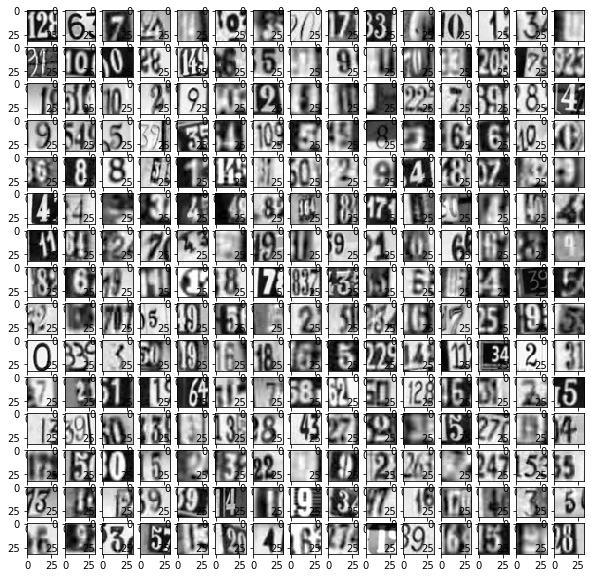

[2 6 7 4 4 0 3 0 7 3 1 0 1 3 1 1 0 0 8 4 6 5 7 9 1 0 3 0 7 2 1 1 0 2 9 0 2
 5 1 3 2 7 9 8 4 9 4 5 9 3 4 0 5 5 8 3 6 6 0 0 6 8 8 3 1 4 7 0 2 9 4 8 7 3
 9 4 4 3 3 4 4 8 6 8 7 4 0 4 4 4 1 4 2 7 4 2 9 1 9 1 0 6 6 3 9 8 6 9 4 1 8
 7 3 3 5 6 1 4 3 5 2 0 0 5 9 5 4 2 5 3 6 7 5 9 5 0 3 3 0 9 6 8 6 5 2 4 1 3
 2 3 7 2 1 1 6 1 7 8 2 0 2 6 1 2 5 1 9 0 3 3 3 8 4 7 2 3 5 7 9 4 7 5 0 5 2
 3 2 7 9 2 6 7 4 5 5 3 1 1 9 9 4 1 9 3 7 1 7 4 3 5 6 9 3 5 1 2 4 6 7 1 9 6
 5 9 8]


In [34]:
# Generating the images for the sample data
w=15
h=15
fig=plt.figure(figsize=(10, 10))
columns = 15
rows = 15
for i in range(0, columns*rows):
    img = X_train[i]
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img, cmap='gray')
plt.show()
print(y_train[:225])

We note that while the target data set has only single digit data, the images shared do have instances of more than one digit. However, in almost all cases, only one digit will is completely shown/ prominent. However, this may affect the accuracy of detecting the digits in most images

In order to perform the KNN analysis, we will need to convert the 32 X 32 set of data into a vector array of 1024 columns

In [35]:
X_train_vec = X_train.reshape(X_train.shape[0],1024)
X_test_vec = X_test.reshape(X_test.shape[0],1024)
X_val_vec = X_val.reshape(X_val.shape[0],1024)

In [36]:
X_train_vec.shape
y_train.shape

(42000,)

In [37]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train_vec)
X_test_scaled = ss.fit_transform(X_test_vec)
X_val_scaled = ss.fit_transform(X_val_vec)

### KNN classifier

In [38]:
pd1=pd.DataFrame(X_train_scaled)

In [39]:
#pd1.corr()>0.8  ### This has been commented out since the time taken for this analyis was more than 6 hours. However, the same was used in the exercise

From the correlation performed, there seem to several correlated dimensions in the data. Hence, to simplify the data and remove relatively correlated data, we will perform a PCA to arrive at the uncorrelated dimensions

In [40]:
from sklearn.decomposition import PCA

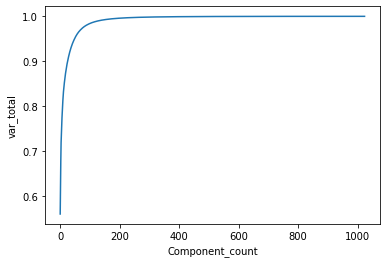

In [59]:
pca = PCA().fit(X_train_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Component_count')
plt.ylabel('var_total');

From the above elbow curve, we see that at 100 components, we should be able to close to 96% - 97% of the variance. Hence, we will now perform the rest of the KNN analysis using these components 

In [ ]:
pca = PCA(n_components=100) 
pca.fit(X_train_scaled) 
Xpca_train = pca.transform(X_train_scaled)
Xpca_test = pca.transform(X_test_scaled) 
Xpca_val = pca.transform(X_val_scaled) 

In [ ]:
from scipy import stats
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

#### Default KNN model

In [ ]:
knn=KNeighborsClassifier()
knn.fit(Xpca_train ,y_train)
predicted_labels = knn.predict(Xpca_test)

In [ ]:
from sklearn import metrics

In [ ]:
print('Classification Report: \n')
print(metrics.classification_report(y_test, predicted_labels))
print("Confusion Matrix: \n")
print(metrics.confusion_matrix(y_test, predicted_labels))

The accuracy is pretty bad with 50% of the target variables (3, 5, 6, 8 and 9) getting a less than 50% f1-score. We will now try to implement a hyper-parameterized version of the same

#### Hyperparameterized KNN model

In [ ]:
N=[3,10, 25, 50,70, 90, 120]
algo=['uniform','distance']

In [ ]:
for i in N:
    for j in algo:
        knn1 = KNeighborsClassifier(n_neighbors= i , weights = j)
        knn1.fit(Xpca_train, y_train)    
        predicted_labels_hyper = knn1.predict(Xpca_val)
        print(i,j)
        print(classification_report(y_val, predicted_labels_hyper))
        

In [ ]:
#Finding predicted labels for N=25 (maximum score)
knn1 = KNeighborsClassifier(n_neighbors= 25 , weights = 'distance')
knn1.fit(Xpca_train, y_train) 
predicted_labels1 = knn1.predict(Xpca_test)

In [ ]:
print(classification_report(y_test, predicted_labels1))

While there are some improvements to the overall accuracy and weighted average, the overall f1-score is still not adequate with an average f1-score of 0.56

### Neural Networks

In [54]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers

#### Standardization of data to Keras format

Changing format in Keras expected input format of sample_count.height,width,channel_count)


In [48]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 1)
input_shape = (32, 32, 1)

Data normalization of the three input data sets:<br> Since the pixel values of the input data range from 0 - 255 across the greyscale, we will use this to normalize the values from o to 1 <br>
We will then convert the target data set into a one hot key encoding

In [49]:
X_train = X_train.astype('float')/255
X_test = X_test.astype('float')/255
X_val = X_val.astype('float')/255

In [50]:
y_train_1hk = keras.utils.to_categorical(y_train, 10) 
y_test_1hk = keras.utils.to_categorical(y_test, 10) 
y_val_1hk = keras.utils.to_categorical(y_val, 10) 

### Model definition

#### Creating the input data layer and Normalization

In [51]:
model_seq = tf.keras.models.Sequential()
model_seq.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,1)))
model_seq.add(tf.keras.layers.BatchNormalization())

#### Defining the hidden and output layers

In [52]:
model_seq.add(tf.keras.layers.Dense(256, activation='relu'))
model_seq.add(tf.keras.layers.Dense(128, activation='relu'))
model_seq.add(tf.keras.layers.Dense(64, activation='relu'))
model_seq.add(tf.keras.layers.Dense(10, activation='softmax'))

#### Define backpropogation model

In [55]:
sgd = optimizers.SGD(lr = 0.01)
model_seq.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
print(model_seq.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 308,298
Trainable params: 306,250
Non-trainable params: 2,048
______________________________________________

### Model implementation

In [56]:
model_seq.fit(X_train,y_train_1hk,validation_data=(X_test,y_test_1hk),epochs=75,batch_size=32)

Train on 42000 samples, validate on 18000 samples
Epoch 1/75
42000/42000 [==============================] - 87s 2ms/sample - loss: 2.3014 - accuracy: 0.1132 - val_loss: 2.2999 - val_accuracy: 0.1237
Epoch 2/75
42000/42000 [==============================] - 19s 460us/sample - loss: 2.2987 - accuracy: 0.1321 - val_loss: 2.2974 - val_accuracy: 0.1528
Epoch 3/75
42000/42000 [==============================] - 83s 2ms/sample - loss: 2.2960 - accuracy: 0.1521 - val_loss: 2.2943 - val_accuracy: 0.1732
Epoch 4/75
42000/42000 [==============================] - 132s 3ms/sample - loss: 2.2926 - accuracy: 0.1658 - val_loss: 2.2903 - val_accuracy: 0.1777
Epoch 5/75
42000/42000 [==============================] - 123s 3ms/sample - loss: 2.2881 - accuracy: 0.1909 - val_loss: 2.2844 - val_accuracy: 0.2215
Epoch 6/75
42000/42000 [==============================] - 116s 3ms/sample - loss: 2.2810 - accuracy: 0.2183 - val_loss: 2.2758 - val_accuracy: 0.2106
Epoch 7/75
42000/42000 [===========================

42000/42000 [==============================] - 116s 3ms/sample - loss: 0.7631 - accuracy: 0.7573 - val_loss: 0.8493 - val_accuracy: 0.7277
Epoch 56/75
42000/42000 [==============================] - 119s 3ms/sample - loss: 0.7492 - accuracy: 0.7614 - val_loss: 0.8978 - val_accuracy: 0.7216
Epoch 57/75
42000/42000 [==============================] - 113s 3ms/sample - loss: 0.7464 - accuracy: 0.7623 - val_loss: 0.8284 - val_accuracy: 0.7451
Epoch 58/75
42000/42000 [==============================] - 117s 3ms/sample - loss: 0.7392 - accuracy: 0.7657 - val_loss: 0.7096 - val_accuracy: 0.7845
Epoch 59/75
42000/42000 [==============================] - 119s 3ms/sample - loss: 0.7326 - accuracy: 0.7673 - val_loss: 0.7419 - val_accuracy: 0.7747
Epoch 60/75
42000/42000 [==============================] - 117s 3ms/sample - loss: 0.7293 - accuracy: 0.7677 - val_loss: 0.8614 - val_accuracy: 0.7260
Epoch 61/75
42000/42000 [==============================] - 115s 3ms/sample - loss: 0.7173 - accuracy: 0.77

In [57]:
score = model_seq.evaluate(X_test, y_test_1hk)
print(score)

18000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.6417892232735952, 0.8101111]


In [58]:
y_pred = model_seq.predict_classes(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1814
           1       0.79      0.85      0.82      1828
           2       0.81      0.84      0.82      1803
           3       0.79      0.74      0.76      1719
           4       0.82      0.87      0.85      1812
           5       0.83      0.71      0.77      1768
           6       0.80      0.81      0.80      1832
           7       0.74      0.91      0.81      1808
           8       0.87      0.72      0.79      1812
           9       0.82      0.79      0.81      1804

    accuracy                           0.81     18000
   macro avg       0.81      0.81      0.81     18000
weighted avg       0.81      0.81      0.81     18000



### Final Conclusion

We get an accuracy of almost 81% in recognizing the images in the data set with just 3 hidden layers in the neural network. This is in comparison to the KNN model where we got only 51%. <br>
Futher, while not reported, the neural networks ran faster with 75 epochs as compared to the KNN network with 12 hyperparameters.<br>
Further, we noticed that increasing the value of the hyperparameters such as number of neighbours all the way up to 120 did not produce any meaningful increase in the accuracy. However, a similar increase in the number of hidden layers or nodes in the neural network would shoot up the image recognizing accuracy. <br>
Having multiple letters in the image (with only one full / prominent letter) could also have confused the neural network a bit. Better segregation in the labelled data could also have helped. After all, a machine learning / deep learning model is only as good as its data